<a href="https://colab.research.google.com/github/KimGriezmann/Bigcontest_2021/blob/master/working_space_JaeHong/pre_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tqdm
import os
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
test_data = pd.read_csv('/content/drive/MyDrive/bigcontest/test_data.csv', encoding = 'euc-kr')

In [45]:
#누락된 출루율 계산
#타석(PA) 열 추가 / PA = 타수 + 볼넷 + 희비
#총안타(total_hit) 열 추가 / total_hit = hit + 2_hit + 3_hit + homerun
#장타(XH) 열 추가 / XH = 2_hit + 3_hit + homerun
test_data['obp'] = test_data['ops'] - test_data['slg']

test_data.insert(7, 'pa', test_data['ab'] + test_data['bb'] + test_data['sf'])
test_data.insert(10, 'total_hit', test_data['hit'] + test_data['2_hit'] + test_data['3_hit'] + test_data['homerun'])
test_data.insert(12, 'xh', test_data['2_hit'] + test_data['3_hit'] + test_data['homerun'])

In [46]:
test_data

,name,day,vs,result,bat_order,position,start_member,pa,ab,score,total_hit,hit,xh,2_hit,3_hit,homerun,tb,rbi,sb,cs,bb,hpp,ibb,so,gdp,sh,sf,avg,obp,slg,ops,pitch,avLI,RE24,WPA
0,강백호,04월 04일,한화,W 3:2,4,1B,1,4,3,0,2,2,0,0,0,0,2,0,2,0,1,0,0,0,0,0,0,0.667,0.750,0.667,1.417,16,1.14,0.89,0.122
1,강백호,04월 06일,LG,L 2:3,4,1B,1,8,7,0,2,2,0,0,0,0,2,0,2,0,1,0,0,2,0,0,0,0.286,0.375,0.286,0.661,30,2.07,-1.00,-0.183
2,강백호,04월 07일,LG,W 7:3,4,1B,1,13,11,0,5,5,0,0,0,0,5,1,2,0,2,0,0,2,0,0,0,0.455,0.538,0.455,0.993,47,1.43,1.75,0.330
3,강백호,04월 08일,LG,L 3:7,4,1B,1,17,15,0,7,7,0,0,0,0,7,1,2,0,2,0,0,3,1,0,0,0.467,0.529,0.467,0.996,64,0.89,-0.76,-0.102
4,강백호,04월 09일,@삼성,L 5:7,4,1B,1,22,20,0,11,10,1,0,1,0,12,4,2,0,2,0,0,4,2,0,0,0.500,0.545,0.600,1.145,85,0.94,1.88,-0.122
5,강백호,04월 10일,@삼성,L 6:7,4,RF,1,26,23,1,12,11,1,0,1,0,13,5,2,0,3,0,0,4,2,0,0,0.478,0.539,0.565,1.104,107,0.94,1.00,0.103
6,강백호,04월 11일,@삼성,L 2:4,4,RF,1,30,27,1,13,12,1,0,1,0,14,5,2,0,3,0,0,4,2,0,0,0.444,0.500,0.519,1.019,123,1.57,-0.20,-0.024
7,강백호,04월 13일,@두산,W 8:7,3,1B,1,35,32,1,14,13,1,0,1,0,15,5,2,0,3,0,0,5,3,0,0,0.406,0.457,0.469,0.926,141,1.31,-2.23,-0.100
8,강백호,04월 14일,@두산,L 1:3,3,1B,1,39,35,1,14,13,1,0,1,0,15,5,2,0,4,0,0,5,3,0,0,0.371,0.435,0.429,0.864,164,1.19,-0.30,-0.042


In [56]:
def cal_feature(data):
  babip = round((data['total_hit'] - data['homerun']) / (data['ab'] - data['so'] - data['homerun'] + data['sf']), 3) #babip
  pitch_pa = round(data['pitch'] / data['pa'], 2) #타석당 투구수
  cq = round((0.5 * data['total_hit'] + 0.3 * data['tb']) / (data['ab'] - data['so']), 3) #컨택 퀄리티
  b_k = data['bb'] / data['so'] #볼삼비
  IsoP = data['slg'] - data['avg'] #순수장타율(장타율 - 타율) 
  IsoD = data['obp'] - data['avg'] #순수출루율(출루율 - 타율)
  psn = round((2 * data['homerun'] * data['sb']) / (data['homerun'] + data['sb']), 3) #호타준족수치
  hr_p = round(data['homerun'] / data['pa'], 3) #타석당 홈런비율
  kk_p = round(data['so'] / data['pa'], 3) #타석당 삼진비율
  bb_p = round(data['bb'] / data['pa'], 3) #타석당 볼넷비율
  xh_ab = round(data['xh'] / data['ab'], 3) #타석당 장타비율
  xh_h = round(data['xh'] / data['total_hit'], 3) #장타비율
  hr_xh = round(data['homerun'] / data['xh'], 3) #장타중 홈런비율
  pa_hr = round(data['pa'] / data['homerun'], 3) #홈런당 타석
  ab_hr = round(data['ab'] / data['homerun'], 3) #홈런당 타수

  data['babip'] = babip
  data['pitch/pa'] = pitch_pa
  data['b/k'] = b_k
  data['IsoP'] = IsoP
  data['IsoD'] = IsoD
  data['psn'] = psn
  data['hr%'] = hr_p
  data['kk%'] = kk_p
  data['bb%'] = bb_p
  data['xh/ab'] = xh_ab
  data['xh/h'] = xh_h
  data['hr/xh'] = hr_xh
  data['pa/hr'] = pa_hr
  data['ab/hr'] = ab_hr

  return data

In [57]:
test = cal_feature(test_data)

In [58]:
test.iloc[:,7:]

,pa,ab,score,total_hit,hit,xh,2_hit,3_hit,homerun,tb,rbi,sb,cs,bb,hpp,ibb,so,gdp,sh,sf,avg,obp,slg,ops,pitch,avLI,RE24,WPA,babip,pitch/pa,b/k,IsoP,IsoD,psn,HR%,KK%,BB%,hr%,kk%,bb%,xh/ab,xh/h,hr/xh,pa/hr,ab/hr
0,4,3,0,2,2,0,0,0,0,2,0,2,0,1,0,0,0,0,0,0,0.667,0.750,0.667,1.417,16,1.14,0.89,0.122,0.667,4.00,inf,0.000,0.083,0.0,0.0,0.000,0.250,0.0,0.000,0.250,0.000,0.000,NaN,inf,inf
1,8,7,0,2,2,0,0,0,0,2,0,2,0,1,0,0,2,0,0,0,0.286,0.375,0.286,0.661,30,2.07,-1.00,-0.183,0.400,3.75,0.500000,0.000,0.089,0.0,0.0,0.250,0.125,0.0,0.250,0.125,0.000,0.000,NaN,inf,inf
2,13,11,0,5,5,0,0,0,0,5,1,2,0,2,0,0,2,0,0,0,0.455,0.538,0.455,0.993,47,1.43,1.75,0.330,0.556,3.62,1.000000,0.000,0.083,0.0,0.0,0.154,0.154,0.0,0.154,0.154,0.000,0.000,NaN,inf,inf
3,17,15,0,7,7,0,0,0,0,7,1,2,0,2,0,0,3,1,0,0,0.467,0.529,0.467,0.996,64,0.89,-0.76,-0.102,0.583,3.76,0.666667,0.000,0.062,0.0,0.0,0.176,0.118,0.0,0.176,0.118,0.000,0.000,NaN,inf,inf
4,22,20,0,11,10,1,0,1,0,12,4,2,0,2,0,0,4,2,0,0,0.500,0.545,0.600,1.145,85,0.94,1.88,-0.122,0.688,3.86,0.500000,0.100,0.045,0.0,0.0,0.182,0.091,0.0,0.182,0.091,0.050,0.091,0.0,inf,inf
5,26,23,1,12,11,1,0,1,0,13,5,2,0,3,0,0,4,2,0,0,0.478,0.539,0.565,1.104,107,0.94,1.00,0.103,0.632,4.12,0.750000,0.087,0.061,0.0,0.0,0.154,0.115,0.0,0.154,0.115,0.043,0.083,0.0,inf,inf
6,30,27,1,13,12,1,0,1,0,14,5,2,0,3,0,0,4,2,0,0,0.444,0.500,0.519,1.019,123,1.57,-0.20,-0.024,0.565,4.10,0.750000,0.075,0.056,0.0,0.0,0.133,0.100,0.0,0.133,0.100,0.037,0.077,0.0,inf,inf
7,35,32,1,14,13,1,0,1,0,15,5,2,0,3,0,0,5,3,0,0,0.406,0.457,0.469,0.926,141,1.31,-2.23,-0.100,0.519,4.03,0.600000,0.063,0.051,0.0,0.0,0.143,0.086,0.0,0.143,0.086,0.031,0.071,0.0,inf,inf
8,39,35,1,14,13,1,0,1,0,15,5,2,0,4,0,0,5,3,0,0,0.371,0.435,0.429,0.864,164,1.19,-0.30,-0.042,0.467,4.21,0.800000,0.058,0.064,0.0,0.0,0.128,0.103,0.0,0.128,0.103,0.029,0.071,0.0,inf,inf


In [ ]:
my_data = final_data.loc[:,['G_ID', 'DATE' , 'order', 'INN', 'batter', 'PCODE', 'POSITION', 'HIT_VEL', 'HIT_ANG_VER', 'HIT_RESULT', 'RESULT_MG', 'result', 'before', 'after', 'vs', 'pitcher', 'PIT_VEL', 'PIT_ID', 'LEV', 'REa', 'WPs', 'WPe', 'WPa']]

In [ ]:
my_data.head(50)

In [ ]:
my_data['HIT_RESULT'].value_counts()

플라이          36223
1루타          29093
땅볼아웃         26282
2루타           8116
홈런            4718
파울플라이         4045
직선타           3576
병살타           3063
내야안타(1루타)     1788
희생플라이         1598
3루타            670
인필드플라이         330
삼중살타             2
Name: HIT_RESULT, dtype: int64

In [ ]:
my_data['HIT_VEL'].describe()

count    119504.000000
mean        134.084469
std          20.602061
min          26.290000
25%         121.930000
50%         137.810000
75%         149.540000
max         210.130000
Name: HIT_VEL, dtype: float64

In [ ]:
my_data['HIT_ANG_VER'].describe()

count    119504.000000
mean         17.474961
std          24.025043
min         -68.100000
25%          -1.400000
50%          14.600000
75%          32.200000
max          89.800000
Name: HIT_ANG_VER, dtype: float64

### **타구 속도 구간 나누기 (10km/h)**

In [ ]:
bins = [0, 100, 110, 120, 130, 140, 150, 160, 170, 210]
bins_label = ['0_100', '100_110', '110_120', '120_130', '130_140', '140_150', '150_160', '160_170', '170_210']

In [ ]:
my_data["HIT_LEVEL"] = pd.cut(my_data["HIT_VEL"], bins, right=False, labels=bins_label)

In [ ]:
my_data['HIT_LEVEL'].value_counts()

140_150    25914
130_140    21806
150_160    21436
120_130    15925
110_120    11265
0_100       8338
100_110     7579
160_170     6750
170_210      490
Name: HIT_LEVEL, dtype: int64

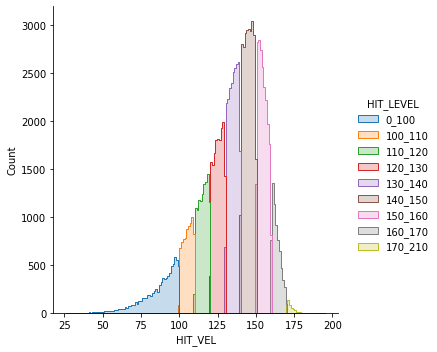

In [ ]:
sns.displot(my_data, x='HIT_VEL', hue='HIT_LEVEL', element='step')

In [ ]:
#타구속도별 안타확률
hit_vel_group_1 = my_data.loc[my_data['HIT_LEVEL'] == '0_100']
hit_vel_group_2 = my_data.loc[my_data['HIT_LEVEL'] == '100_110']
hit_vel_group_3 = my_data.loc[my_data['HIT_LEVEL'] == '110_120']
hit_vel_group_4 = my_data.loc[my_data['HIT_LEVEL'] == '120_130']
hit_vel_group_5 = my_data.loc[my_data['HIT_LEVEL'] == '130_140']
hit_vel_group_6 = my_data.loc[my_data['HIT_LEVEL'] == '140_150']
hit_vel_group_7 = my_data.loc[my_data['HIT_LEVEL'] == '150_160']
hit_vel_group_8 = my_data.loc[my_data['HIT_LEVEL'] == '160_170']
hit_vel_group_9 = my_data.loc[my_data['HIT_LEVEL'] == '170_210']

In [ ]:
hit_vel_group_1['HIT_RESULT'].value_counts()

땅볼아웃         3680
플라이          2044
1루타           894
파울플라이         856
내야안타(1루타)     274
병살타           273
직선타           137
2루타            90
인필드플라이         87
희생플라이           2
3루타             1
Name: HIT_RESULT, dtype: int64

In [ ]:
#타구속도 그룹별 타율계산
group1_avg = round(len(hit_vel_group_1[(hit_vel_group_1['HIT_RESULT']=='1루타') | (hit_vel_group_1['HIT_RESULT']=='2루타') | (hit_vel_group_1['HIT_RESULT']=='3루타') | (hit_vel_group_1['HIT_RESULT']=='내야안타(1루타)')| (hit_vel_group_1['HIT_RESULT']=='홈런')]) / len(hit_vel_group_1), 3)
group2_avg = round(len(hit_vel_group_2[(hit_vel_group_2['HIT_RESULT']=='1루타') | (hit_vel_group_2['HIT_RESULT']=='2루타') | (hit_vel_group_2['HIT_RESULT']=='3루타') | (hit_vel_group_2['HIT_RESULT']=='내야안타(1루타)')| (hit_vel_group_2['HIT_RESULT']=='홈런')]) / len(hit_vel_group_2), 3)
group3_avg = round(len(hit_vel_group_3[(hit_vel_group_3['HIT_RESULT']=='1루타') | (hit_vel_group_3['HIT_RESULT']=='2루타') | (hit_vel_group_3['HIT_RESULT']=='3루타') | (hit_vel_group_3['HIT_RESULT']=='내야안타(1루타)')| (hit_vel_group_3['HIT_RESULT']=='홈런')]) / len(hit_vel_group_3), 3)
group4_avg = round(len(hit_vel_group_4[(hit_vel_group_4['HIT_RESULT']=='1루타') | (hit_vel_group_4['HIT_RESULT']=='2루타') | (hit_vel_group_4['HIT_RESULT']=='3루타') | (hit_vel_group_4['HIT_RESULT']=='내야안타(1루타)')| (hit_vel_group_4['HIT_RESULT']=='홈런')]) / len(hit_vel_group_4), 3)
group5_avg = round(len(hit_vel_group_5[(hit_vel_group_5['HIT_RESULT']=='1루타') | (hit_vel_group_5['HIT_RESULT']=='2루타') | (hit_vel_group_5['HIT_RESULT']=='3루타') | (hit_vel_group_5['HIT_RESULT']=='내야안타(1루타)')| (hit_vel_group_5['HIT_RESULT']=='홈런')]) / len(hit_vel_group_5), 3)
group6_avg = round(len(hit_vel_group_6[(hit_vel_group_6['HIT_RESULT']=='1루타') | (hit_vel_group_6['HIT_RESULT']=='2루타') | (hit_vel_group_6['HIT_RESULT']=='3루타') | (hit_vel_group_6['HIT_RESULT']=='내야안타(1루타)')| (hit_vel_group_6['HIT_RESULT']=='홈런')]) / len(hit_vel_group_6), 3)
group7_avg = round(len(hit_vel_group_7[(hit_vel_group_7['HIT_RESULT']=='1루타') | (hit_vel_group_7['HIT_RESULT']=='2루타') | (hit_vel_group_7['HIT_RESULT']=='3루타') | (hit_vel_group_7['HIT_RESULT']=='내야안타(1루타)')| (hit_vel_group_7['HIT_RESULT']=='홈런')]) / len(hit_vel_group_7), 3)
group8_avg = round(len(hit_vel_group_8[(hit_vel_group_8['HIT_RESULT']=='1루타') | (hit_vel_group_8['HIT_RESULT']=='2루타') | (hit_vel_group_8['HIT_RESULT']=='3루타') | (hit_vel_group_8['HIT_RESULT']=='내야안타(1루타)')| (hit_vel_group_8['HIT_RESULT']=='홈런')]) / len(hit_vel_group_8), 3)
group9_avg = round(len(hit_vel_group_9[(hit_vel_group_9['HIT_RESULT']=='1루타') | (hit_vel_group_9['HIT_RESULT']=='2루타') | (hit_vel_group_9['HIT_RESULT']=='3루타') | (hit_vel_group_9['HIT_RESULT']=='내야안타(1루타)')| (hit_vel_group_9['HIT_RESULT']=='홈런')]) / len(hit_vel_group_9), 3)

In [ ]:
hit_vel_group_1['HIT_RESULT'].value_counts()

땅볼아웃         3680
플라이          2044
1루타           894
파울플라이         856
내야안타(1루타)     274
병살타           273
직선타           137
2루타            90
인필드플라이         87
희생플라이           2
3루타             1
Name: HIT_RESULT, dtype: int64

In [ ]:
#타구속도 그룹별 장타율 계산
group1_slg = round((len(hit_vel_group_1[(hit_vel_group_1['HIT_RESULT']=='1루타')])*1 + len(hit_vel_group_1[(hit_vel_group_1['HIT_RESULT']=='내야안타(1루타)')])*1 + len(hit_vel_group_1[(hit_vel_group_1['HIT_RESULT']=='2루타')])*2 + len(hit_vel_group_1[(hit_vel_group_1['HIT_RESULT']=='3루타')])*3 + len(hit_vel_group_1[(hit_vel_group_1['HIT_RESULT']=='홈런')])*4) / len(hit_vel_group_1), 3)
group2_slg = round((len(hit_vel_group_2[(hit_vel_group_2['HIT_RESULT']=='1루타')])*1 + len(hit_vel_group_2[(hit_vel_group_2['HIT_RESULT']=='내야안타(1루타)')])*1 + len(hit_vel_group_2[(hit_vel_group_2['HIT_RESULT']=='2루타')])*2 + len(hit_vel_group_2[(hit_vel_group_2['HIT_RESULT']=='3루타')])*3 + len(hit_vel_group_2[(hit_vel_group_2['HIT_RESULT']=='홈런')])*4) / len(hit_vel_group_2), 3)
group3_slg = round((len(hit_vel_group_3[(hit_vel_group_3['HIT_RESULT']=='1루타')])*1 + len(hit_vel_group_3[(hit_vel_group_3['HIT_RESULT']=='내야안타(1루타)')])*1 + len(hit_vel_group_3[(hit_vel_group_3['HIT_RESULT']=='2루타')])*2 + len(hit_vel_group_3[(hit_vel_group_3['HIT_RESULT']=='3루타')])*3 + len(hit_vel_group_3[(hit_vel_group_3['HIT_RESULT']=='홈런')])*4) / len(hit_vel_group_3), 3)
group4_slg = round((len(hit_vel_group_4[(hit_vel_group_4['HIT_RESULT']=='1루타')])*1 + len(hit_vel_group_4[(hit_vel_group_4['HIT_RESULT']=='내야안타(1루타)')])*1 + len(hit_vel_group_4[(hit_vel_group_4['HIT_RESULT']=='2루타')])*2 + len(hit_vel_group_4[(hit_vel_group_4['HIT_RESULT']=='3루타')])*3 + len(hit_vel_group_4[(hit_vel_group_4['HIT_RESULT']=='홈런')])*4) / len(hit_vel_group_4), 3)
group5_slg = round((len(hit_vel_group_5[(hit_vel_group_5['HIT_RESULT']=='1루타')])*1 + len(hit_vel_group_5[(hit_vel_group_5['HIT_RESULT']=='내야안타(1루타)')])*1 + len(hit_vel_group_5[(hit_vel_group_5['HIT_RESULT']=='2루타')])*2 + len(hit_vel_group_5[(hit_vel_group_5['HIT_RESULT']=='3루타')])*3 + len(hit_vel_group_5[(hit_vel_group_5['HIT_RESULT']=='홈런')])*4) / len(hit_vel_group_5), 3)
group6_slg = round((len(hit_vel_group_6[(hit_vel_group_6['HIT_RESULT']=='1루타')])*1 + len(hit_vel_group_6[(hit_vel_group_6['HIT_RESULT']=='내야안타(1루타)')])*1 + len(hit_vel_group_6[(hit_vel_group_6['HIT_RESULT']=='2루타')])*2 + len(hit_vel_group_6[(hit_vel_group_6['HIT_RESULT']=='3루타')])*3 + len(hit_vel_group_6[(hit_vel_group_6['HIT_RESULT']=='홈런')])*4) / len(hit_vel_group_6), 3)
group7_slg = round((len(hit_vel_group_7[(hit_vel_group_7['HIT_RESULT']=='1루타')])*1 + len(hit_vel_group_7[(hit_vel_group_7['HIT_RESULT']=='내야안타(1루타)')])*1 + len(hit_vel_group_7[(hit_vel_group_7['HIT_RESULT']=='2루타')])*2 + len(hit_vel_group_7[(hit_vel_group_7['HIT_RESULT']=='3루타')])*3 + len(hit_vel_group_7[(hit_vel_group_7['HIT_RESULT']=='홈런')])*4) / len(hit_vel_group_7), 3)
group8_slg = round((len(hit_vel_group_8[(hit_vel_group_8['HIT_RESULT']=='1루타')])*1 + len(hit_vel_group_8[(hit_vel_group_8['HIT_RESULT']=='내야안타(1루타)')])*1 + len(hit_vel_group_8[(hit_vel_group_8['HIT_RESULT']=='2루타')])*2 + len(hit_vel_group_8[(hit_vel_group_8['HIT_RESULT']=='3루타')])*3 + len(hit_vel_group_8[(hit_vel_group_8['HIT_RESULT']=='홈런')])*4) / len(hit_vel_group_8), 3)
group9_slg = round((len(hit_vel_group_9[(hit_vel_group_9['HIT_RESULT']=='1루타')])*1 + len(hit_vel_group_9[(hit_vel_group_9['HIT_RESULT']=='내야안타(1루타)')])*1 + len(hit_vel_group_9[(hit_vel_group_9['HIT_RESULT']=='2루타')])*2 + len(hit_vel_group_9[(hit_vel_group_9['HIT_RESULT']=='3루타')])*3 + len(hit_vel_group_9[(hit_vel_group_9['HIT_RESULT']=='홈런')])*4) / len(hit_vel_group_9), 3)

In [ ]:
#타구속도 그룹별 순장타율 계산
group1_IsoP = group1_slg - group1_avg
group2_IsoP = group2_slg - group2_avg
group3_IsoP = group3_slg - group3_avg
group4_IsoP = group4_slg - group4_avg
group5_IsoP = group5_slg - group5_avg
group6_IsoP = group6_slg - group6_avg
group7_IsoP = group7_slg - group7_avg
group8_IsoP = group8_slg - group8_avg
group9_IsoP = group9_slg - group9_avg

In [ ]:
#타구속도 그룹별 평균 WPa(승리 기여도 변화)
group1_WPa = hit_vel_group_1['WPa'].mean()
group2_WPa = hit_vel_group_2['WPa'].mean()
group3_WPa = hit_vel_group_3['WPa'].mean()
group4_WPa = hit_vel_group_4['WPa'].mean()
group5_WPa = hit_vel_group_5['WPa'].mean()
group6_WPa = hit_vel_group_6['WPa'].mean()
group7_WPa = hit_vel_group_7['WPa'].mean()
group8_WPa = hit_vel_group_8['WPa'].mean()
group9_WPa = hit_vel_group_9['WPa'].mean()

In [ ]:
#타구속도 그룹별 평균 REa(기대 득점 변화)
group1_REa = hit_vel_group_1['REa'].mean()
group2_REa = hit_vel_group_2['REa'].mean()
group3_REa = hit_vel_group_3['REa'].mean()
group4_REa = hit_vel_group_4['REa'].mean()
group5_REa = hit_vel_group_5['REa'].mean()
group6_REa = hit_vel_group_6['REa'].mean()
group7_REa = hit_vel_group_7['REa'].mean()
group8_REa = hit_vel_group_8['REa'].mean()
group9_REa = hit_vel_group_9['REa'].mean()

In [ ]:
hit_probability = pd.DataFrame(columns=['HIT_VEL','AVG', 'SLG'])
hit_vel_name = ['0_100', '100_110', '110_120', '120_130', '130_140', '140_150', '150_160', '160_170', '170_210']
hit_avg = [group1_avg, group2_avg, group3_avg, group4_avg, group5_avg, group6_avg, group7_avg, group8_avg, group9_avg]
hit_slg = [group1_slg, group2_slg, group3_slg, group4_slg, group5_slg, group6_slg, group7_slg, group8_slg, group9_slg]
hit_IsoP = [group1_IsoP, group2_IsoP, group3_IsoP, group4_IsoP, group5_IsoP, group6_IsoP, group7_IsoP, group8_IsoP, group9_IsoP]
hit_WPa = [group1_WPa, group2_WPa, group3_WPa, group4_WPa, group5_WPa, group6_WPa, group7_WPa, group8_WPa, group9_WPa]
hit_REa = [group1_REa, group2_REa, group3_REa, group4_REa, group5_REa, group6_REa, group7_REa, group8_REa, group9_REa]

hit_probability = pd.concat([hit_probability, pd.DataFrame({'HIT_VEL':hit_vel_name, 'AVG':hit_avg, 'SLG':hit_slg, 'IsoP':hit_IsoP, 'REa':hit_REa, 'WPa':hit_WPa})])
hit_probability

,HIT_VEL,AVG,SLG,IsoP,REa,WPa
0,0_100,0.151,0.162,0.011,-0.171125,-0.014332
1,100_110,0.291,0.309,0.018,-0.063727,-0.005232
2,110_120,0.260,0.283,0.023,-0.089444,-0.007443
3,120_130,0.239,0.266,0.027,-0.100141,-0.007894
4,130_140,0.280,0.346,0.066,-0.048716,-0.003553
5,140_150,0.411,0.639,0.228,0.107528,0.009051
6,150_160,0.586,1.075,0.489,0.327070,0.026972
7,160_170,0.673,1.339,0.666,0.452221,0.037975
8,170_210,0.702,1.398,0.696,0.489331,0.044306
